# Example of optimizing function

# Goal is to test the objective values found by HyperOpt

# Benchmarking test with different iterations for serial executions

In [84]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

space = {
            'a': hp.uniform('a', -2, 2),
            'b': hp.uniform('b', -2, 2)
                
        }

In [85]:
import math

def get_objective(x,y):
        x2 = math.pow(x,2)
        x4 = math.pow(x,4)
        y2 = math.pow(y,2)
        return ((4.0 - 2.1 * x2 + (x4 / 3.0)) * x2 + x*y + (-4.0 + 4.0 * y2) * y2)


    
def objective(args_list):
    a = args_list['a']
    b = args_list['b']
    result = get_objective(a,b)
    return {'loss': result, 'status': STATUS_OK }

In [86]:
Store_Optimal_X = []
Store_Results = []
num_of_tries = 20

In [87]:

#Since 5 random were tried in Bayesian, here we add 5 extra

import warnings
warnings.filterwarnings("ignore")

for i in range(num_of_tries):
    
    trials = Trials()
    best_10 = fmin(fn=objective, space=space, algo=tpe.suggest, trials=trials, max_evals=10)
    best_10 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_20 = fmin(fn=objective, space=space, algo=tpe.suggest, trials=trials, max_evals=20)
    best_20 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_30 = fmin(fn=objective, space=space, algo=tpe.suggest, trials=trials, max_evals=30)
    best_30 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_40 = fmin(fn=objective, space=space, algo=tpe.suggest, trials=trials, max_evals=40)
    best_40 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_50 = fmin(fn=objective, space=space, algo=tpe.suggest,trials=trials, max_evals=50)
    best_50 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_60 = fmin(fn=objective, space=space, algo=tpe.suggest,trials=trials, max_evals=60)
    best_60 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_70 = fmin(fn=objective, space=space, algo=tpe.suggest,trials=trials, max_evals=70)
    best_70 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_80 = fmin(fn=objective, space=space, algo=tpe.suggest,trials=trials, max_evals=80)
    best_80 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_90 = fmin(fn=objective, space=space, algo=tpe.suggest,trials=trials, max_evals=90)
    best_90 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_100 = fmin(fn=objective, space=space, algo=tpe.suggest,trials=trials, max_evals=100)
    best_100 = -1.0*min(trials.losses())
    
    print(i,':',[best_20,best_40,best_60])
    Store_Optimal_X.append([best_10,best_20,best_30,best_40,best_50,best_60,best_70,best_80,best_90,best_100])
    

100%|██████████| 100/100 [00:00<00:00, 449.83it/s, best loss: -0.9695647728333644]
0 : [0.7362319090816429, 0.8991371920663117, 0.6453523863637813]
100%|██████████| 100/100 [00:00<00:00, 439.20it/s, best loss: -0.9307843191008047]
1 : [0.32518141328186695, 0.6624099886169287, 0.9729584251577799]
100%|██████████| 100/100 [00:00<00:00, 453.40it/s, best loss: -1.0244642897956466]
2 : [0.9914037848061787, 0.7340142699275375, 0.928122277850702]
100%|██████████| 100/100 [00:00<00:00, 367.94it/s, best loss: -1.0021451123918805]
3 : [0.5087182432837709, 1.01074256983679, 1.0279071185452222]
100%|██████████| 100/100 [00:00<00:00, 452.12it/s, best loss: -0.9963000191011082]
4 : [1.017151737865686, 0.42844234245098367, 0.6989697492344397]
100%|██████████| 100/100 [00:00<00:00, 440.29it/s, best loss: -1.0223712447935376]
5 : [0.8290865754109173, 0.8942856983348502, 1.0205426588444222]
100%|██████████| 100/100 [00:00<00:00, 449.67it/s, best loss: -0.9357140913080131]
6 : [0.4560406366547042, 0.6337

100%|██████████| 100/100 [00:00<00:00, 445.08it/s, best loss: -1.0198803455888923]
18 : [0.35051000946339955, 0.9580143640305905, 0.6787803913682124]
100%|██████████| 100/100 [00:00<00:00, 422.48it/s, best loss: -1.0249483831410613]
19 : [0.13426264364967336, 0.9290327442437868, 1.0074780332549877]


In [88]:
import numpy as np
plotting_array = np.array(Store_Optimal_X)

In [2]:
plotting_itr =[10, 20,30,40,50,60,70,80,90,100]

Y = []

for i in range(len(plotting_itr)):
    y_value = plotting_array[:,i].mean()
    Y.append(y_value)

In [90]:
Y

[0.3598941114018377,
 0.5031186924324942,
 0.7684536683273281,
 0.8506450467299589,
 0.885097642676547,
 0.8885029372240638,
 0.9286136095703027,
 0.9822152917126287,
 0.9951195406631521,
 0.9876532406597496]

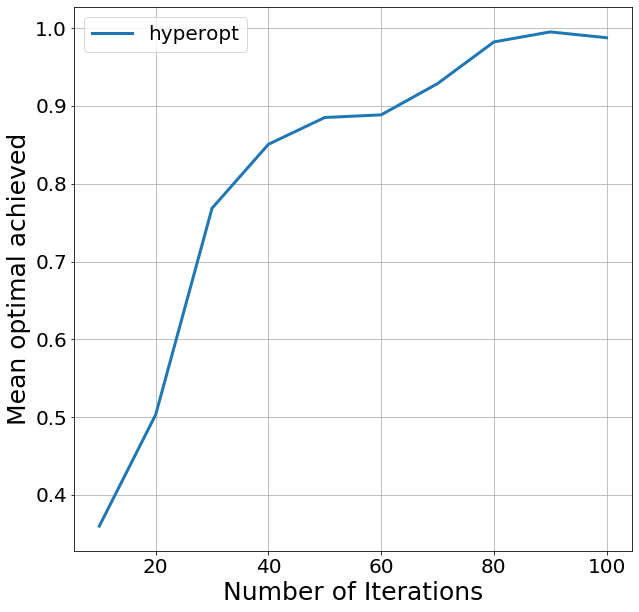

In [91]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))


plt.plot(plotting_itr,Y,label = 'hyperopt',linewidth=3.0) #x, y


plt.xlabel('Number of Iterations',fontsize=25)
plt.ylabel('Mean optimal achieved',fontsize=25)
#plt.title('Variation of Optimal Value of X with iterations',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
#plt.yticks(np.arange(0.915, 0.925, step=0.005))
plt.legend(fontsize=20)
plt.show()

# Generating the final plots

In [3]:
Y_Random =[0.1553783776302589,
 0.48704185115971926,
 0.6207976430203805,
 0.7307124078791386,
 0.7758538571628398,
 0.812800521783022,
 0.8414774276254022,
 0.85722684004176,
 0.8703548752976193,
 0.885542410391353]

In [4]:
Y_hyperOpt=[0.3598941114018377,
 0.5031186924324942,
 0.7684536683273281,
 0.8506450467299589,
 0.885097642676547,
 0.8885029372240638,
 0.9286136095703027,
 0.9822152917126287,
 0.9951195406631521,
 0.9876532406597496]

In [5]:
Y_mango=[0.32929475172058553,
 0.540795722822591,
 0.6438876373806363,
 0.7544160031201501,
 0.7821982419246343,
 0.8179952347980965,
 0.8537401984891557,
 0.8843359869101644,
 0.9050414633436121,
 0.9141776538433961]

In [15]:
Y_mango_alpha=[0.7781756268566407,
 0.960699828435813,
 0.9701169039374233,
 0.9863174835034276,
 0.9910204921295143,
 0.9997564868287329,
 0.9998840251068661,
 1.0142815470582747,
 1.0193911626394399,
 1.0206296932997425]

In [6]:
Y_mango_batch=[0.796511981294226,
 0.9306523129199139,
 0.9539583933449342,
 0.9881576752662344,
 0.9985849576037781,
 1.013403214905187,
 1.0272008135436104,
 1.0306462051233245,
 1.0310746578439984,
 1.0312883810211027]

In [17]:
Y_mango_batch_cluster =[0.9981342223871664,
 1.0119216624848866,
 1.0276198169207444,
 1.0306077992023934,
 1.0308380073544767,
 1.0310802728043744,
 1.0312194891746076,
 1.0312489045474407,
 1.0313829968590762,
 1.0314300184876861]

In [18]:
plotting_itr =[10, 20,30,40,50,60,70,80,90,100]

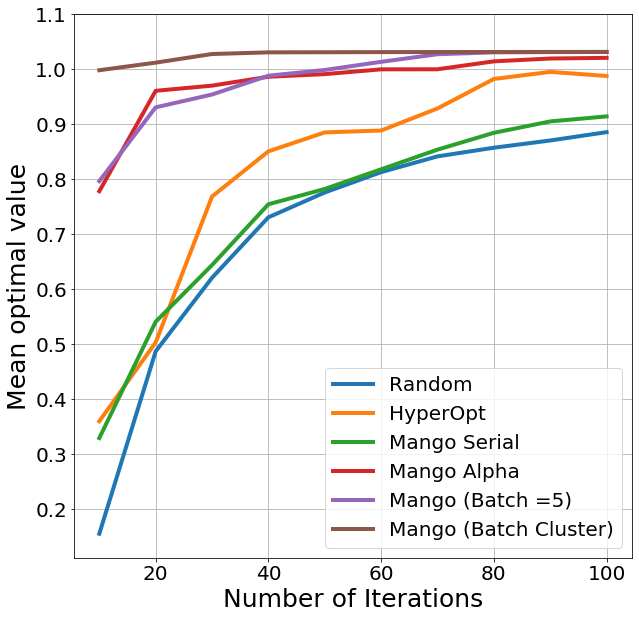

In [19]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))


plt.plot(plotting_itr,Y_Random,label = 'Random',linewidth=4.0) #x, y
plt.plot(plotting_itr,Y_hyperOpt,label = 'HyperOpt',linewidth=4.0) #x, y
plt.plot(plotting_itr,Y_mango,label = 'Mango Serial',linewidth=4.0) #x, y
plt.plot(plotting_itr,Y_mango_alpha,label = 'Mango Alpha',linewidth=4.0) #x, y
plt.plot(plotting_itr,Y_mango_batch,label = 'Mango (Batch =5)',linewidth=4.0) #x, y

plt.plot(plotting_itr,Y_mango_batch_cluster,label = 'Mango (Batch Cluster)',linewidth=4.0) #x, y




plt.xlabel('Number of Iterations',fontsize=25)
plt.ylabel('Mean optimal value',fontsize=25)
#plt.title('Accuracy in SVM with iterations',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.yticks(np.arange(0.2, 1.2, step=0.1))
#plt.xticks(np.arange(10, 110, step=10))
plt.legend(fontsize=20)
plt.show()